# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [165]:
# set my seed
set.seed(20232023)

# betas
betas <- runif(4, min = 0, max = 3)

# beta not
b0 <- betas[1]
# beta one
b1 <- betas[2]
# beta two
b2 <- betas[3]
# beta three
b3 <- betas[4]

# generate dataset; X & Y
x <- rnorm(100)
epsilon <- rnorm(100) # noise vector
y <- b0 + (b1*x) + (b2*(x^2)) + (b3+(x^3)) + epsilon

# make dataframe (df)
df <- data.frame(y, x)
head(df) # sanity check

,y,x
,<dbl>,<dbl>
1,-9.458413,-2.03092573
2,-3.952886,-1.65490262
3,2.168742,-0.09930555
4,5.319230,0.72922549
5,4.400902,-0.03968407
6,8.110305,0.94623507


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [166]:
# install leaps package
install.packages("leaps")
library(leaps)

# use regsubsets() to identify the best model as a function of the number of 
  # predictors it has (see tutorial)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [167]:
# determine best model X - X^10
  # for loop 
for (i in 2:10) {
  df[paste0("x",i)] <- df$x^i
}

# make model; see tutorial
# regsubsets uses the same model configuration as lm(); regsubsets(model, data)
regfit.full <- regsubsets(y ~ ., df, nvmax = 10) # "nvmax" set to 10 variables
reg.summary <- summary(regfit.full)
#reg.summary

# directly query which terms are included at each level of complexity
#reg.summary$which

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

In [168]:
# plotting, load tidyverse/ggplot2
library(tidyverse)
library(ggplot2)

# create vector that lists the number of variables in sequence 
numvar = 1:length(reg.summary$rss)
# starting point for an indicator that marks the best model choice for each metric.
allfalse = rep(FALSE, length(reg.summary$rss))

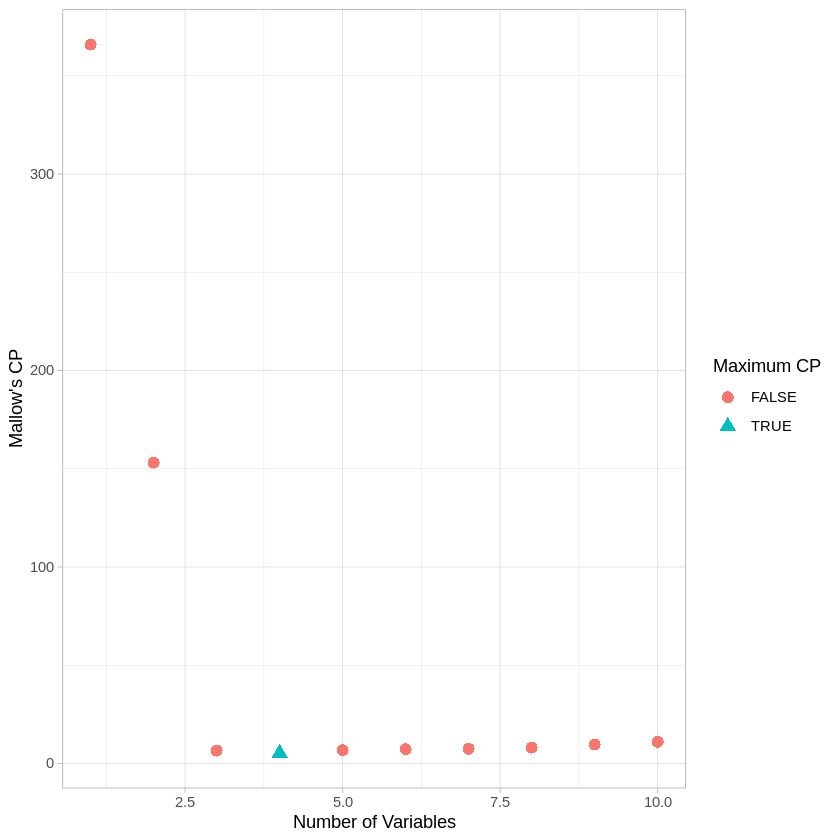

In [169]:
# Mallow's Cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE

# plotting 
ggplot(cp.df, aes(x = numvar, y = cp, shape = mincp, col = mincp)) + 
  geom_point(size = 3) + theme_light() + 
  labs(x = "Number of Variables", y = "Mallow's CP", color = "Maximum CP", shape = "Maximum CP")

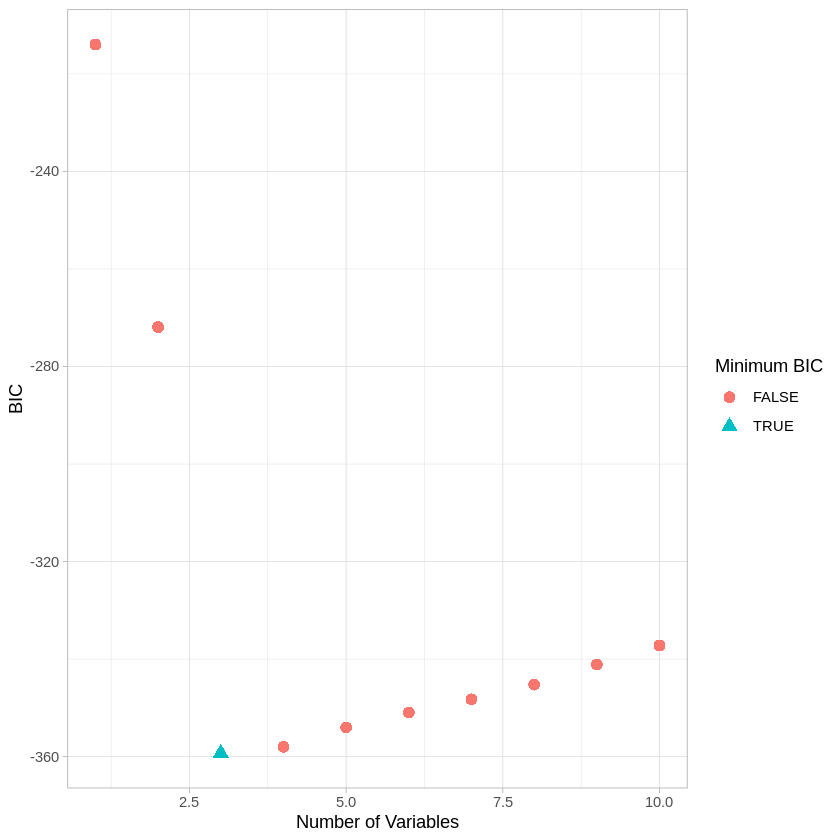

In [170]:
# Bayesian Information Criteria (BIC)
bic.df <- data.frame(numvar = numvar, bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE

# plotting
ggplot(bic.df,aes(x = numvar, y = bic, shape = minbic, col = minbic)) + 
  geom_point(size = 3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color = "Minimum BIC", shape = "Minimum BIC")

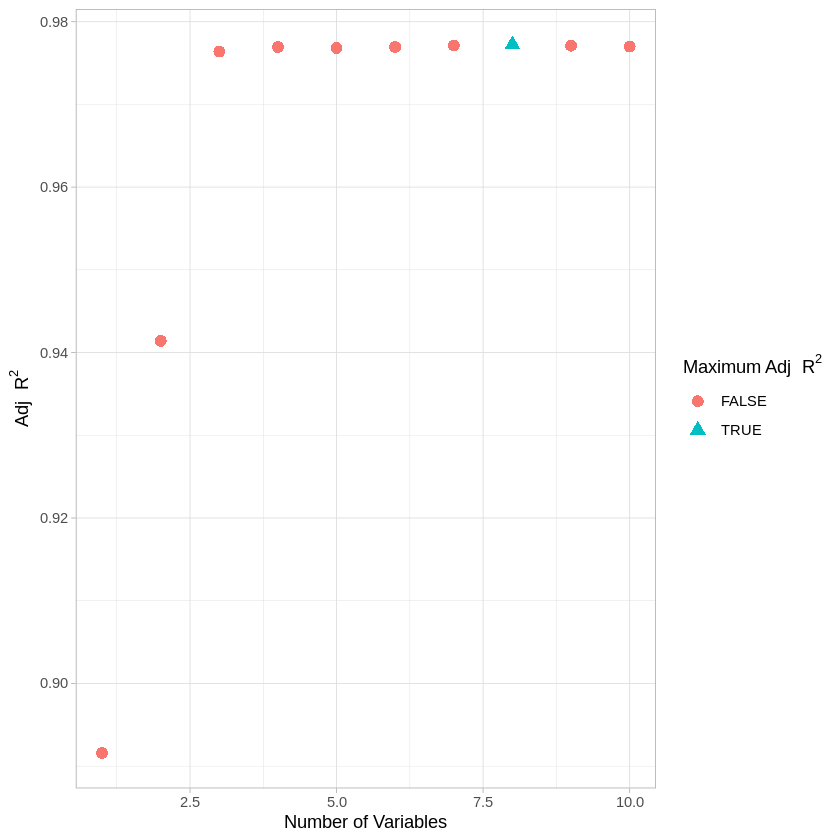

In [171]:
# adjusted coefficient of determination R^2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE

# plotting
ggplot(adjr2.df,aes(x = numvar,y = adjr2,shape = maxadjr2,col = maxadjr2)) + 
  geom_point(size = 3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color = 'Maximum Adj'~R^2, shape = 'Maximum Adj'~R^2)

In [172]:
# identifying which model has the best bias-adjusted fit

# Mallow's Cp
which.min(reg.summary$cp) # smaller is better with Mallow's Cp value, so min
coef(regfit.full, which.min(cp)) # coefficients

# BIC
which.min(reg.summary$bic) # smaller is better with BIC value, so min
coef(regfit.full, which.min(bic)) # coefficients

# Adjusted R^2
which.max(reg.summary$adjr2) # larger is better with adjusted R^2 value, so max
coef(regfit.full, which.max(adjr2)) # coefficients

[1] 4

(Intercept)           x          x3          x4          x6 
 3.15274481  2.79205489  1.12433965  0.55885757 -0.07866455

[1] 3

(Intercept)           x          x2          x3 
  2.9230533   2.8031067   0.9576612   1.1027507

[1] 8

(Intercept)           x          x4          x5          x6          x7 
 3.10784808  2.95644008  1.41410429  1.54165788 -1.12848201 -0.65956902 
         x8          x9         x10 
 0.39794153  0.08564011 -0.04737211

> *Picking the best model really depends; a model consisting of  4 terms is best per the Mallow's Cp, a model consisting of 3 terms is best per the BIC, and a model consisting of 8 terms is best per the adjusted R-squared.*

> *The ideal model selected by Mallow's Cp (consisting of 4 terms) would be
X (coefficient = 2.79), X3 (coefficient = 1.12), X4 (coefficient = 0.56), and X6 (coefficient = -0.08).*

> *The ideal model selected by BIC (consisting of 3 terms) would be X (coefficient = 2.80), X2 (coefficient = 0.98), and X3 (coefficient = 1.10).*

> *The ideal model selected by Adjusted R^2 (consisting of 8 terms) would be X (coefficient = 2.96), X4 (coefficient = 1.41), X5 (coefficient = 1.54), X6 (coefficient = -1.13), X7 (coefficient = -0.66), X8 (coefficient = 0.40), X9 (coefficient = 0.09), and X10 (coefficient = -0.05).*

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [173]:
regfit.forward <- regsubsets(y ~ ., df, nvmax = 10, method = c("forward"))
reg.forward.summary <- summary(regfit.forward)
#reg.forward.summary

# directly query which terms are included at each level of complexity
#reg.forward.summary$which

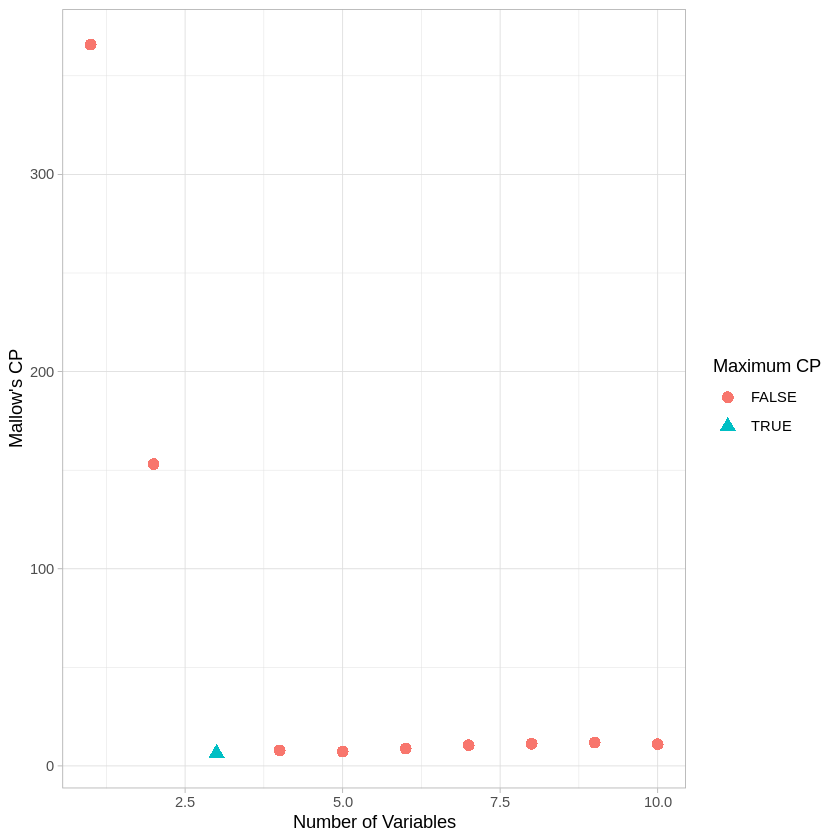

In [174]:
# Mallow's Cp
cp.df.forward <- data.frame(numvar = numvar, cp.forward <- reg.forward.summary$cp, mincp.forward <- allfalse)
cp.df.forward$mincp.forward[which.min(reg.forward.summary$cp)] <- TRUE

# plotting 
ggplot(cp.df.forward, aes(x = numvar, y = cp.forward, shape = mincp.forward, col = mincp.forward)) + 
  geom_point(size = 3) + theme_light() + 
  labs(x = "Number of Variables", y = "Mallow's CP", color = "Maximum CP", shape = "Maximum CP")

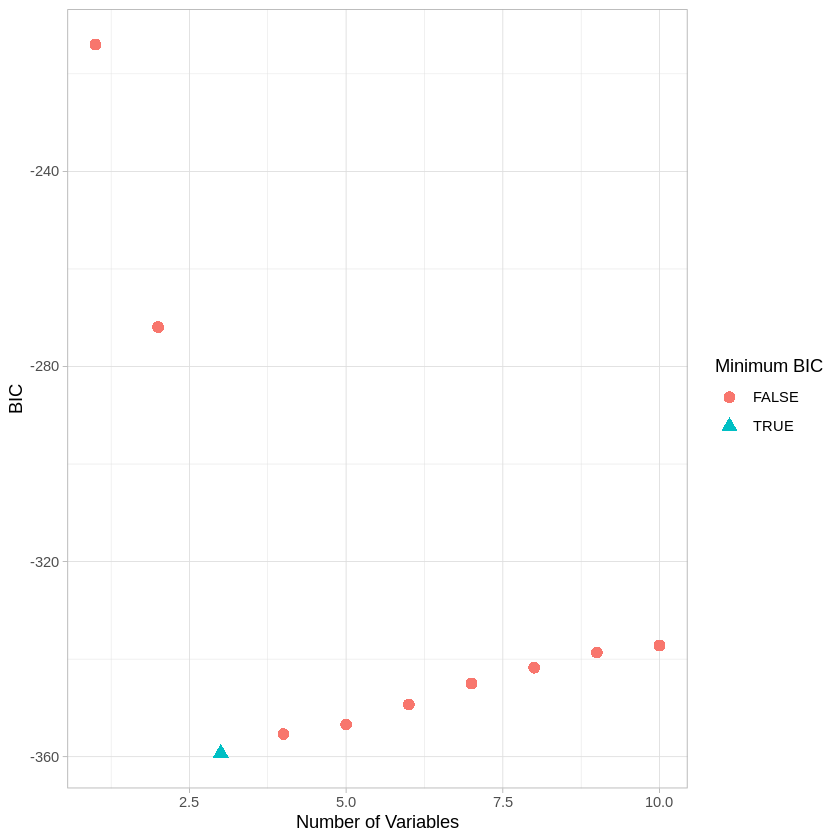

In [181]:
# Bayesian Information Criteria (BIC)
bic.df.forward <- data.frame(numvar = numvar, bic.forward <- reg.forward.summary$bic, minbic.forward <- allfalse)
bic.df.forward$minbic.forward[which.min(reg.forward.summary$bic)] <- TRUE

# plotting
ggplot(bic.df.forward,aes(x = numvar, y = bic.forward, shape = minbic.forward, col = minbic.forward)) + 
  geom_point(size = 3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color = "Minimum BIC", shape = "Minimum BIC")

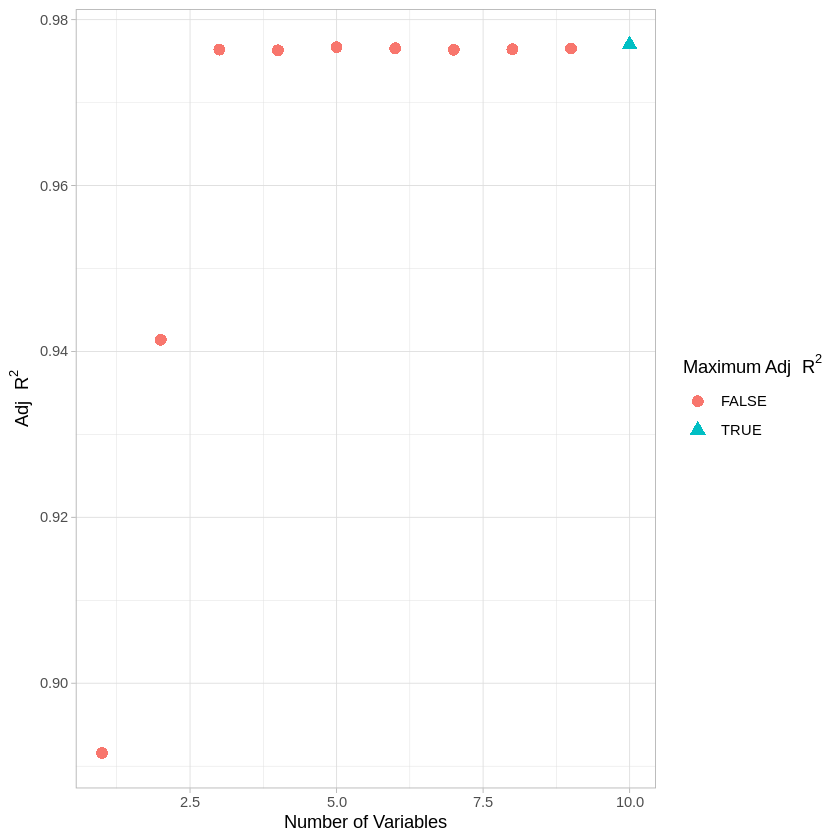

In [182]:
# adjusted coefficient of determination R^2
adjr2.df.forward <- data.frame(numvar = numvar, adjr2.forward <- reg.forward.summary$adjr2, maxadjr2.forward <- allfalse)
adjr2.df.forward$maxadjr2.forward[which.max(reg.forward.summary$adjr2)] <- TRUE

# plotting
ggplot(adjr2.df.forward,aes(x = numvar,y = adjr2.forward,shape = maxadjr2.forward,col = maxadjr2.forward)) + 
  geom_point(size = 3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color = 'Maximum Adj'~R^2, shape = 'Maximum Adj'~R^2)

In [183]:
# identifying which model has the best bias-adjusted fit

# Mallow's C
which.min(reg.forward.summary$cp) # 3 PVs
coef(regfit.forward, which.min(cp.forward))

# BIC
which.min(reg.forward.summary$bic) # 3 PVs
coef(regfit.forward, which.min(bic.forward))

# Adjusted R^2
which.max(reg.forward.summary$adjr2) # 10 PVs
coef(regfit.forward, which.max(adjr2.forward))

[1] 3

(Intercept)           x          x2          x3 
  2.9230533   2.8031067   0.9576612   1.1027507

[1] 3

(Intercept)           x          x2          x3 
  2.9230533   2.8031067   0.9576612   1.1027507

[1] 10

(Intercept)           x          x2          x3          x4          x5 
 3.23634398  3.41466213 -1.19501571 -1.36371795  3.52606515  2.73446215 
         x6          x7          x8          x9         x10 
-2.48510518 -1.05300370  0.75809226  0.12886239 -0.08108901

b) Backwards stepwise selection:

In [184]:
regfit.backward <- regsubsets(y ~ ., df, nvmax = 10, method = c("backward"))
reg.backward.summary <- summary(regfit.backward)
#reg.backward.summary

# directly query which terms are included at each level of complexity
#reg.backward.summary$which

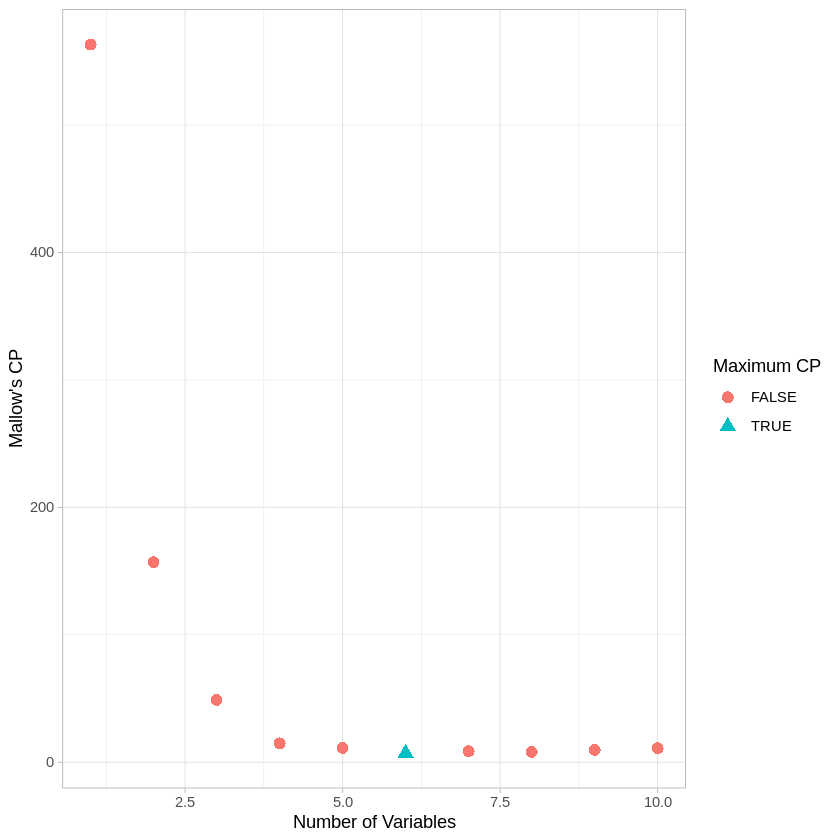

In [185]:
# Mallow's Cp
cp.df.backward <- data.frame(numvar = numvar, cp.backward <- reg.backward.summary$cp, mincp.backward <- allfalse)
cp.df.backward$mincp.backward[which.min(reg.backward.summary$cp)] <- TRUE

# plotting 
ggplot(cp.df.backward, aes(x = numvar, y = cp.backward, shape = mincp.backward, col = mincp.backward)) + 
  geom_point(size = 3) + theme_light() + 
  labs(x = "Number of Variables", y = "Mallow's CP", color = "Maximum CP", shape = "Maximum CP")

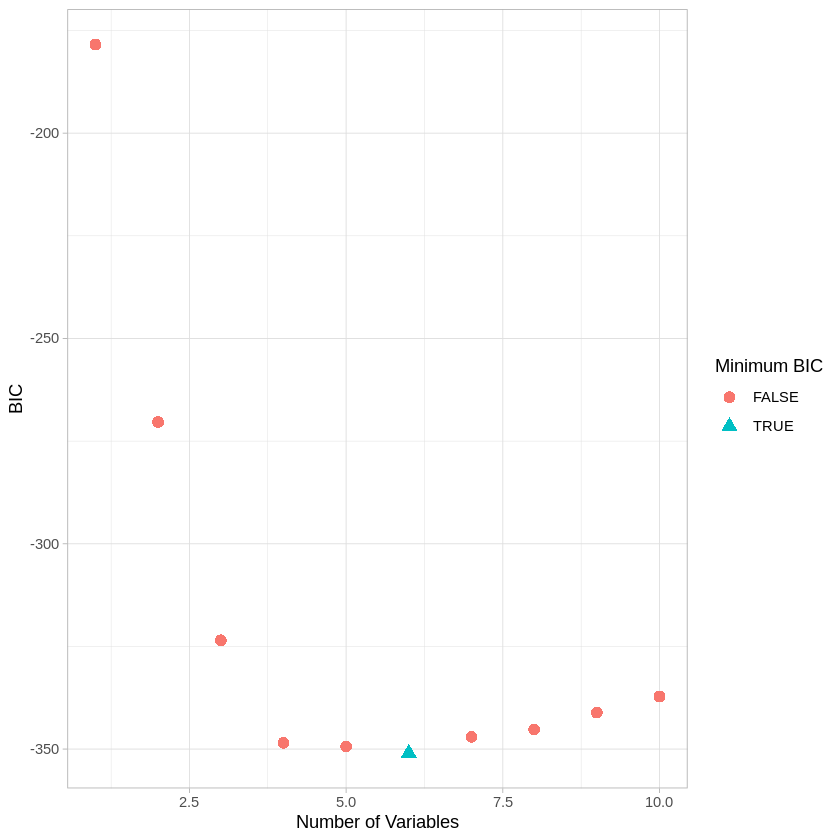

In [186]:
# Bayesian Information Criteria (BIC)
bic.df.backward <- data.frame(numvar = numvar, bic.backward <- reg.backward.summary$bic, minbic.backward <- allfalse)
bic.df.backward$minbic.backward[which.min(reg.backward.summary$bic)] <- TRUE

# plotting
ggplot(bic.df.backward,aes(x = numvar, y = bic.backward, shape = minbic.backward, col = minbic.backward)) + 
  geom_point(size = 3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color = "Minimum BIC", shape = "Minimum BIC")

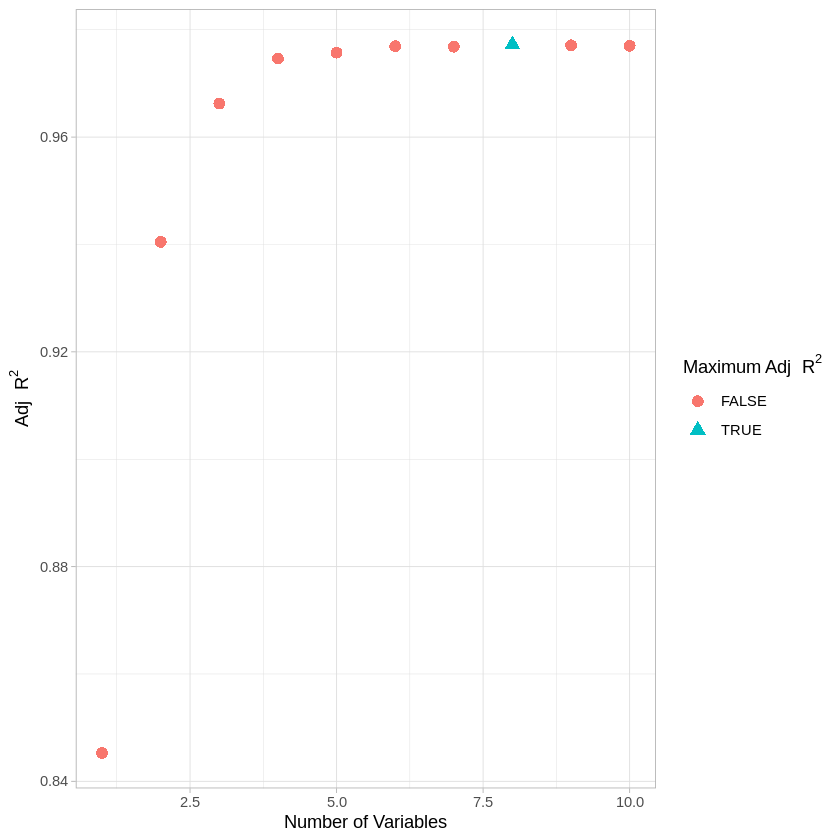

In [187]:
# adjusted coefficient of determination R^2
adjr2.df.backward <- data.frame(numvar = numvar, adjr2.backward <- reg.backward.summary$adjr2, maxadjr2.backward <- allfalse)
adjr2.df.backward$maxadjr2.backward[which.max(reg.backward.summary$adjr2)] <- TRUE

# plotting
ggplot(adjr2.df.backward,aes(x = numvar,y = adjr2.backward,shape = maxadjr2.backward,col = maxadjr2.backward)) + 
  geom_point(size = 3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color = 'Maximum Adj'~R^2, shape = 'Maximum Adj'~R^2)

In [188]:
# identifying which model has the best bias-adjusted fit

# Mallow's C
which.min(reg.backward.summary$cp) # 6 PVs
coef(regfit.backward, which.min(cp.backward))

# BIC
which.min(reg.backward.summary$bic) # 6 PVs
coef(regfit.backward, which.min(bic.backward))

# Adjusted R^2
which.max(reg.backward.summary$adjr2) # 8 PVs
coef(regfit.backward, which.max(adjr2.backward))

[1] 6

(Intercept)            x           x4           x5           x7           x9 
 3.165992729  3.139558469  0.423283747  1.065096841 -0.380914468  0.044695257 
         x10 
-0.003184219

[1] 6

(Intercept)            x           x4           x5           x7           x9 
 3.165992729  3.139558469  0.423283747  1.065096841 -0.380914468  0.044695257 
         x10 
-0.003184219

[1] 8

(Intercept)           x          x4          x5          x6          x7 
 3.10784808  2.95644008  1.41410429  1.54165788 -1.12848201 -0.65956902 
         x8          x9         x10 
 0.39794153  0.08564011 -0.04737211

c) Compare your results from parts a and b with those of question 1.

> *With respect to number of predictors selected for Mallow's Cp, best subset selection preferred 4 terms, forward stepwise selection preferred 3, and backwards stepwise selection preferred 6 terms.* 
> *With respect to number of predictors selected for BIC, best subset selection preferred 3 terms, forward stepwise selection preferred 3, and backwards stepwise selection preferred 6 terms.* 
> *With respect to number of predictors selected for Adjusted R^2, best subset selection preferred 8 terms, forward stepwise selection preferred 10, and backwards stepwise selection preferred 8 terms.*
> *Overall it seems like backward stepwise selection prefers more including more predictors compared to best subset selection and forward stepwise selection. Also, depending on which selection method was used, the chosen predictor variables themselves (e.g., X1, X2, etc.) varied a lot.*

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [189]:
set.seed(20232023)

# make second df
df2 <- matrix(NA, nrow = 1000, ncol = 21)
epsilon2 <- rnorm(1000)

# for loop
for (i in 2:21) {
  df2[,i] <- rnorm(1000)
}

beta = runif(20)
beta[sample(20, 5)] = 0
#print(beta)

#  for loop
for (i in 1:nrow(df2)) {
  df2[i,1] = (df2[i,2:21] %*% beta) + epsilon2[i]
}

df2 <- data.frame(df2)
colnames(df2) <- append("y", paste0("x", 1:20)) # column names

## Create test train split
train <- sample(nrow(df2) * 0.1)
df2_train <- df2[train,]
df2_test <- df2[-train,]

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [190]:
# Perform best subset selection on the training set; as done above
regfit.full <- regsubsets(y ~ ., df2_train, nvmax = 20)
bestsubset_summary <- summary(regfit.full)
#bestsubset_summary

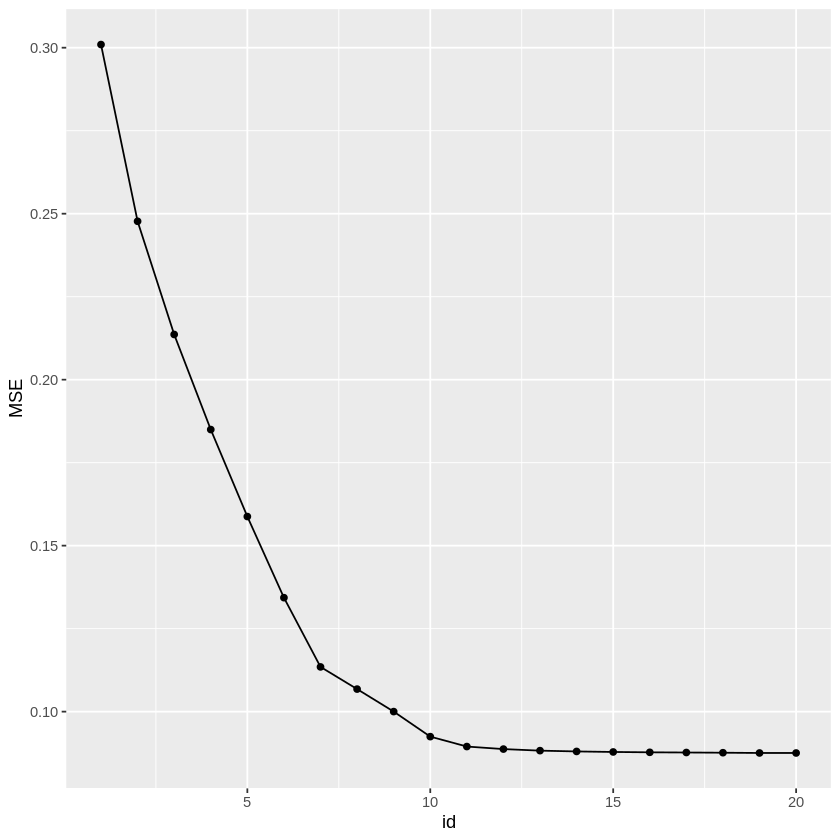

In [191]:
## Plot associated TRAINING set MSE for best model of each size; use tibble
tibble(MSE = bestsubset_summary$rss/900) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + # x = id, y = MSE
  geom_line() + 
  geom_point()

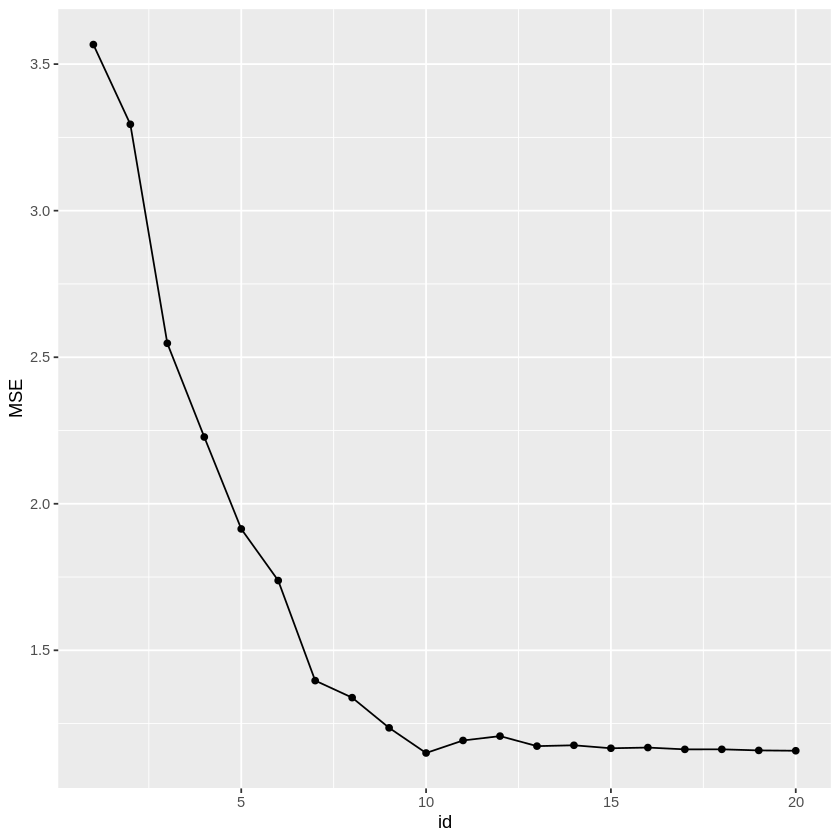

In [192]:
## Plot associated TEST set MSE for best model of each size
test_errors = rep(NA, 19)
test.matrix <- model.matrix(y ~ ., data = df2_test)

# for loop
for (i in 1:20) {
  coeffs = coef(regfit.full, id = i)
  pred = test.matrix[,names(coeffs)]%*%coeffs
  test_errors[i] = mean((df2_test$y-pred)^2)
}

# plot with tibble
tibble(MSE = test_errors) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + # x = id, y = MSE
  geom_line() + 
  geom_point()

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [193]:
# best model according to test MSE
which.min(test_errors)
coef(regfit.full, which.min(test_errors))

[1] 10

(Intercept)          x3          x7          x8          x9         x10 
  0.1378889   0.2571606   0.4414726   0.6724975   0.5418854   0.5460384 
        x11         x12         x14         x17         x20 
  0.3011642   0.9055060   0.3001974   0.5036424   0.9072794

> *The test MSE tries to find the best combination of predictor variables that fit with our data, resulting in a 10 term model (out of 20 predictors). Comparing these actual model coefficients versus the ones calculated above with the test MSE, the coefficients are comparable.*

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*